In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# House Prices - Advanced Regression Techniques

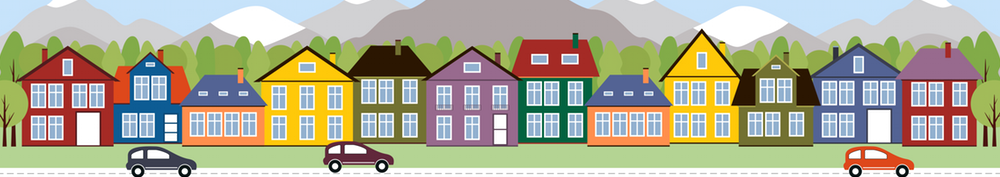  
Photo by Tom Thain on Unsplash.

## Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Goal:

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.



In [2]:
# import lib & package

from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [3]:
# create scrollable table for better visualization of table
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

# Note Credit: https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough

## 1. EDA

#### Load Data

In [4]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

#### Data Explore

##### Check Shape

In [5]:
print("Train data shape: ", df_train.shape)
print("Test  data shape: ", df_test.shape )

Train data shape:  (1460, 81)
Test  data shape:  (1459, 80)


##### Check few rows of each dataset

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


##### Divide two data types: Numerical and Categorical

In [8]:
num_col = df_train.select_dtypes(include='number').columns
cat_col = df_train.select_dtypes(include='object').columns

num_col2 = df_test.select_dtypes(include='number').columns
cat_col2 = df_test.select_dtypes(include='object').columns

num_col = np.array(num_col)
#cat_col = np.array(cat_col)

print(num_col, len(num_col))
print(cat_col, len(cat_col))

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice'] 38
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 

Numerical columns  : 36 + ID/SalePrice = total 38  
Categorical columns: 43 

Each column lists are above 

###### Categorical Data Boxplot

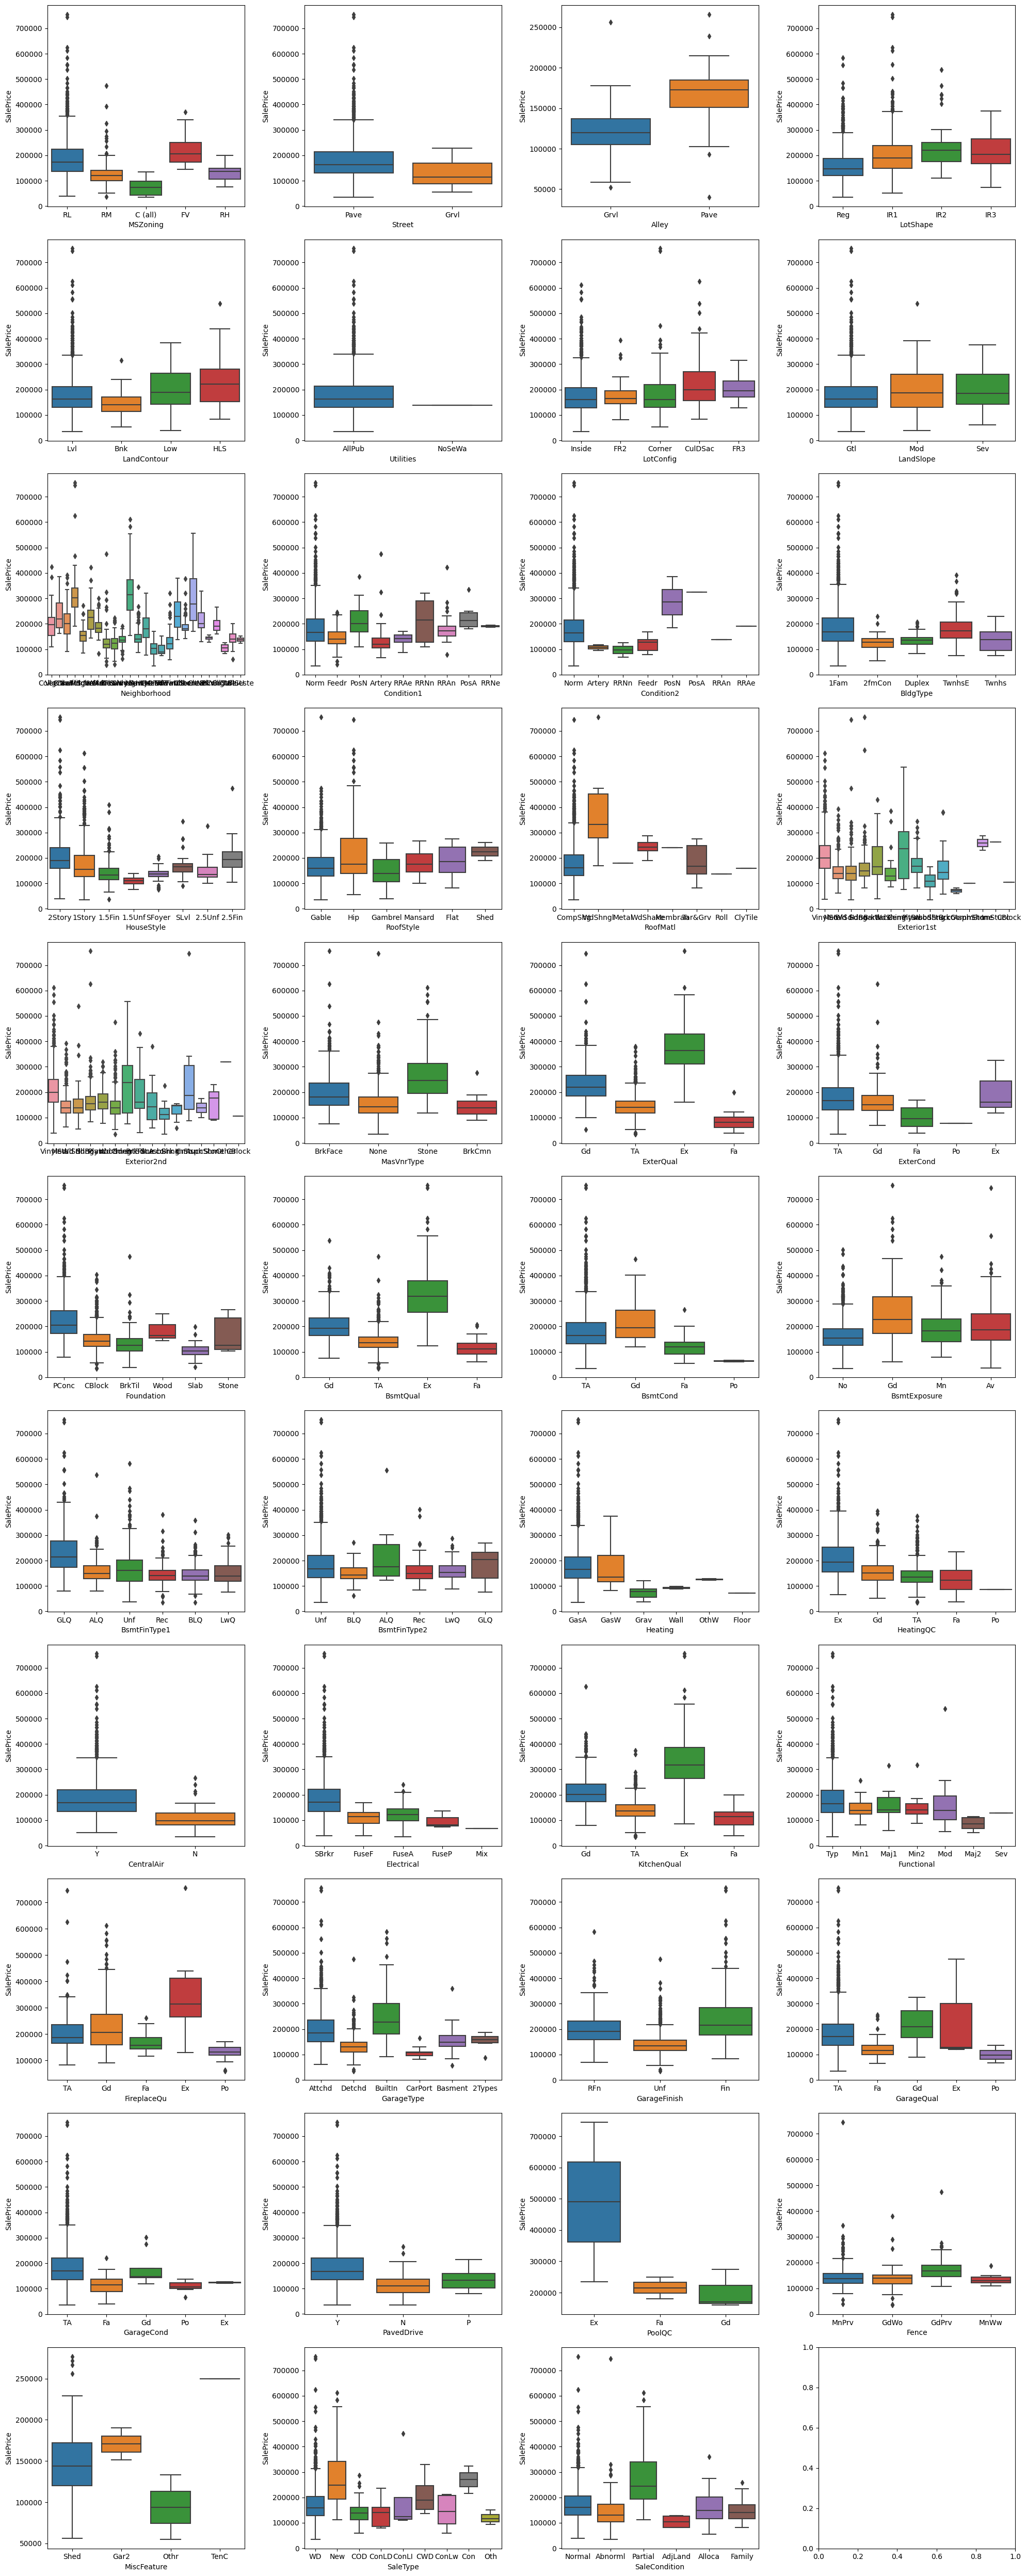

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axes = plt.subplots(11, 4, figsize=(20, 50))

for cat, ax in zip(cat_col, axes.flatten()):
    sns.boxplot(x=cat, y='SalePrice', data=df_train, ax=ax)
    ax.set_ylabel('SalePrice')
plt.tight_layout()
plt.show()

There are three categorical columns that contains two options: Street, Utilities, CentralAir. Look at those data

In [10]:
for col in ['Street', 'Utilities', 'CentralAir']:
    print(col)
    print(df_train[col].value_counts())

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64


Remove Street and Utilities because of no relevant to prediction

Found more columns that unrelvant to prediction

In [11]:
for col in ['Condition2', 'RoofMatl', 'Heating','PoolQC']:
    print(col)
    print(df_train[col].value_counts())

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
PoolQC
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


In [12]:
df_train.drop(columns=['Street', 'Utilities','Condition2', 'RoofMatl', 'Heating','PoolQC'], inplace=True)
df_test.drop(columns= ['Street', 'Utilities','Condition2', 'RoofMatl', 'Heating','PoolQC'], inplace=True)

In [13]:
idx = [0,37]
num_col = np.delete(num_col, idx)
num_col2= np.delete(num_col2, 0)

##### Remove outliers from training set

In [14]:
def remove_outliers(train_df, col_name):
    q1 = train_df[col_name].quantile(0.25)
    q3 = train_df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    train_df = train_df[(train_df[col_name] >= lower_bound) & (train_df[col_name] <= upper_bound)]
    return train_df

for c in ['OverallQual', '1stFlrSF',  'TotRmsAbvGrd', 'GarageArea']:
    df_train = remove_outliers(df_train, c)


In [15]:
df_train.shape

(1400, 75)

##### Find Missing Values

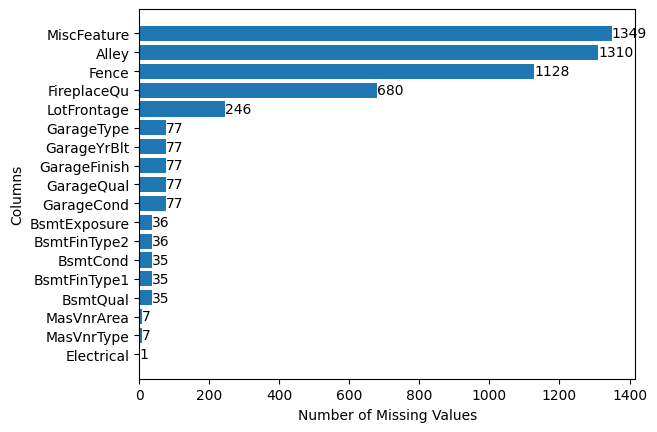

In [16]:
plt.figure();
# Compute the number of missing values in each column
missing_values_counts = df_train.isna().sum(axis=0)

# Get the indices of columns with non-zero missing values
non_zero_counts = missing_values_counts[missing_values_counts != 0]

# Sort the non-zero counts in descending order
non_zero_counts_sorted = non_zero_counts.sort_values(ascending=False)

# Plot the bar graph
sns.barplot(y = non_zero_counts_sorted.index, x = non_zero_counts_sorted, orient='h')

# Set labels and title
plt.ylabel('Columns')
plt.xlabel('Number of Missing Values')

# Add text labels for each bar
bars = plt.barh(non_zero_counts_sorted.index, non_zero_counts_sorted)
for bar in bars:
    value = bar.get_width()
    plt.text(value, bar.get_y() + bar.get_height() / 2, str(int(value)), ha='left', va='center')

19 columns with missing values. Majority missing values are in 'MiscFeature', 'Alley', 'Fence', 'FirePlaceQu'.



Look at the percentage of missing values for each column

In [17]:
# Percentage of missing values for each feature
# Compute the percentage of missing values in each column
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100

# Sort the missing percentage values in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Create a scrollable table with the sorted missing percentages
html_missing_percentage = create_scrollable_table(missing_percentage_sorted.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

# Display the table
display(HTML(html_missing_percentage))

,0
MiscFeature,96.357143
Alley,93.571429
Fence,80.571429
FireplaceQu,48.571429
LotFrontage,17.571429
GarageQual,5.500000
GarageFinish,5.500000
GarageType,5.500000
GarageYrBlt,5.500000
GarageCond,5.500000


'MiscFeature', 'Alley', 'Fence' > 80% missing values. I drop these features.

In [18]:
df_train.drop(columns=['MiscFeature', 'Alley','Fence'], inplace=True)
df_test.drop(columns= ['MiscFeature', 'Alley','Fence'], inplace=True)

In [19]:
df_train.shape, df_test.shape

((1400, 72), (1459, 71))

We will decide how to fill the missing value in later

### Dependant Variable Exploration

In [20]:
import scipy.stats as stats

y = df_train['SalePrice']

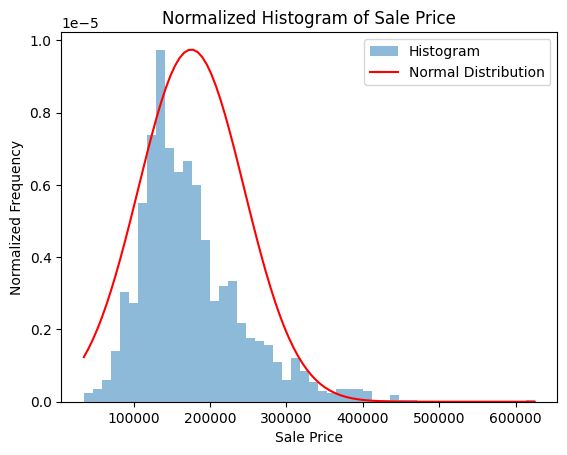

In [21]:
plt.figure()
# Calculate the histogram
hist, bins = np.histogram(y, bins=50, density=True)

# Plot the histogram
plt.hist(y, bins=50, density=True, alpha=0.5, label='Histogram')

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(y)

# Generate the x-values for the normal distribution curve
x = np.linspace(min(y), max(y), 100)

# Compute the corresponding y-values using the normal distribution function
y_normal = stats.norm.pdf(x, mu, sigma)

# Normalize the normal distribution curve to match the histogram
normalizer = np.sum(hist * np.diff(bins))
y_normal_normalized = y_normal / normalizer

# Calculate the scaling factor
scaling_factor = np.max(hist) / np.max(y_normal_normalized)

# Scale the normal distribution curve
y_normal_scaled = y_normal_normalized * scaling_factor

# Plot the normalized normal distribution curve
plt.plot(x, y_normal_scaled, 'r-', label='Normal Distribution')

# Set labels and title
plt.xlabel('Sale Price')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Sale Price')

# Show the legend
plt.legend()


From the plot above, the dependant variable, 'Sale Price', is not normal distributions. Therefore, transform is neccessary. 

Two: Johnson Distribution and Log Distribution

<AxesSubplot: title={'center': 'Log Normal'}, xlabel='SalePrice'>

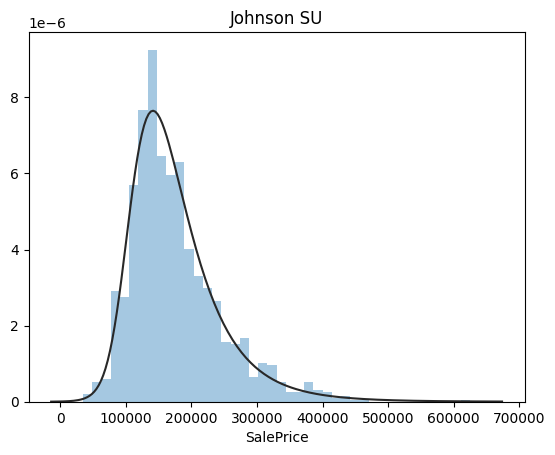

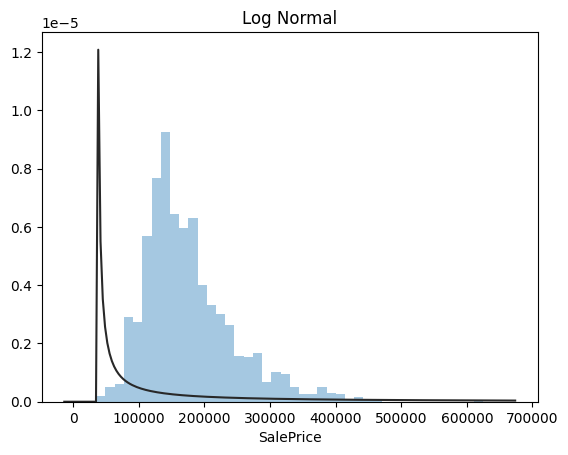

In [22]:
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

#note credit: https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1/notebook?scriptVersionId=12846740


Both of them are much better than normal distribution. However, Johnson distribution is little bit better so I am using Johnson distribution

#### Feature Data Exploration (Feature Engineering)

###### Here are questions to me for feature engineering:

1. Do we need all features (total 79)?
2. If not, what features do we want to use?
3. Any new feature from combining/finding relationship between exist features?
4. Do numerical features stay numerical? Or do categorical feature stay categorical?
5. Any nomarlization needs for any features?
6. What about missing values?


In [23]:
pd.set_option('display.max_columns', None)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Text(0.5, 1.0, 'Sale Price-Mean Sale Price vs Month')

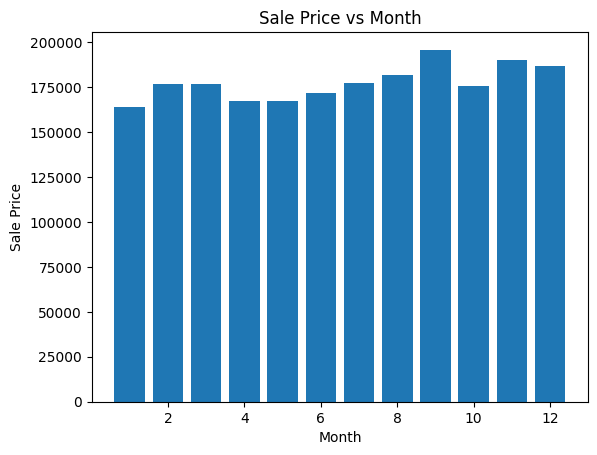

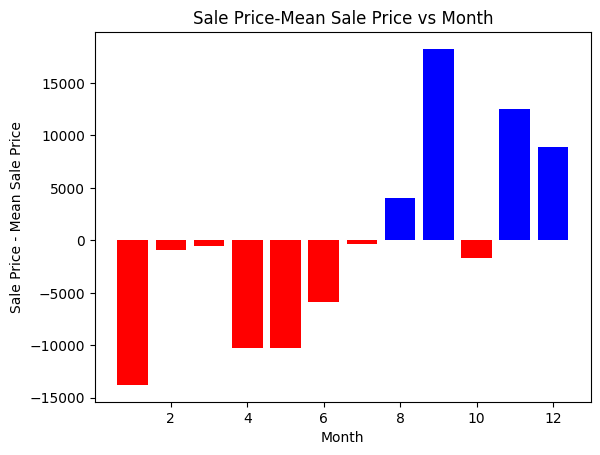

In [24]:
mon_sale = df_train.groupby('MoSold')['SalePrice'].mean()
plt.figure(1)
plt.bar(np.arange(1,13), mon_sale)
plt.xlabel('Month')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Month')

plt.figure(2)
# Create an array to store the colors for each bar
colors = ['blue' if val >= 0 else 'red' for val in mon_sale-np.mean(mon_sale)]

# Plot the bar chart with different colors for positive and negative bars
plt.bar(np.arange(1, 13), mon_sale-np.mean(mon_sale), color=colors)
plt.xlabel('Month')
plt.ylabel('Sale Price - Mean Sale Price')
plt.title('Sale Price-Mean Sale Price vs Month')

Instead of using sold_year, it is more valuable to see age of the property from built and remod time.

In [25]:
df_train['AgeHouse']   = df_train['YrSold'] - df_train['YearBuilt']
df_train['AgeReHouse'] = df_train['YrSold'] - df_train['YearRemodAdd']

df_test['AgeHouse']   = df_test['YrSold'] - df_test['YearBuilt']
df_test['AgeReHouse'] = df_test['YrSold'] - df_test['YearRemodAdd']

In [26]:
df_train.drop(columns=['YrSold', 'YearBuilt','YearRemodAdd'], inplace=True)
df_test.drop(columns= ['YrSold', 'YearBuilt','YearRemodAdd'], inplace=True)

Text(0.5, 1.0, 'Sale Prices vs Properties Age Rome Remodeling')

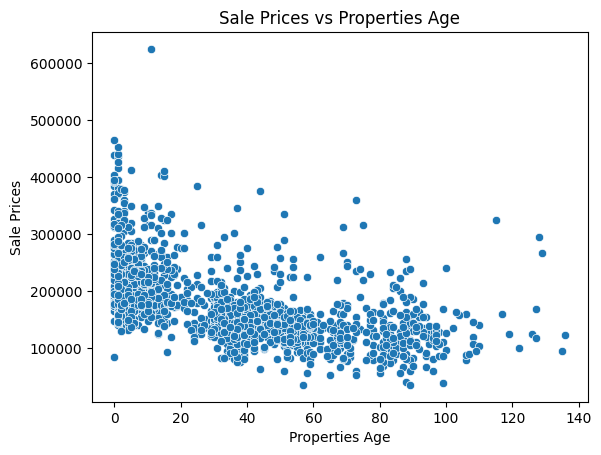

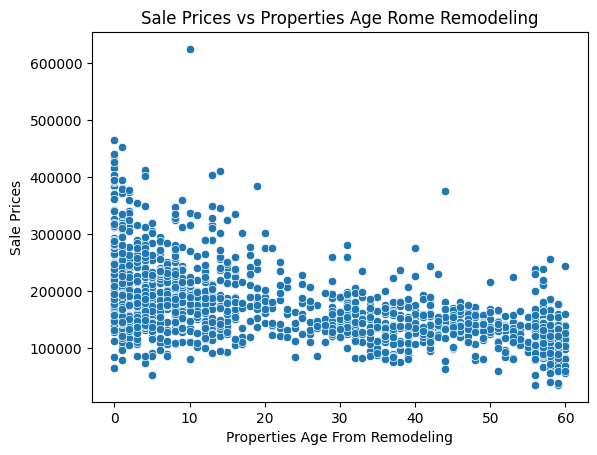

In [27]:
plt.figure(1)
sns.scatterplot(x=df_train['AgeHouse'], y=df_train['SalePrice'])
plt.xlabel("Properties Age")
plt.ylabel("Sale Prices")
plt.title("Sale Prices vs Properties Age")

plt.figure(2)
sns.scatterplot(x=df_train['AgeReHouse'], y=df_train['SalePrice'])
plt.xlabel("Properties Age From Remodeling")
plt.ylabel("Sale Prices")
plt.title("Sale Prices vs Properties Age Rome Remodeling")

Missing Values

In [28]:
# fill appropratie values for missing values
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'LotFrontage', 'MasVnrArea'):
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)


for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu']:
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType','Electrical'):
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')
    
for col in ('BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'):
    df_test[col] = df_test[col].fillna(0)
    
for col in ('Functional', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType'):
    df_test[col] = df_test[col].fillna('None')

df_train['MSZoning'] = df_train.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
df_test['MSZoning'] = df_test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))


In [29]:
df_test.isna().sum().sum()

0

In [30]:
df_train.isna().sum().sum()

0

<AxesSubplot: >

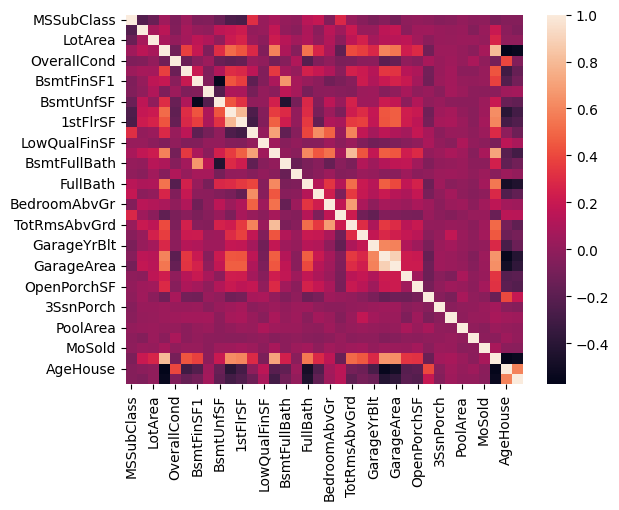

In [31]:
# heat map
df_corr= df_train.drop(columns=['Id']).select_dtypes(include=['int', 'float'])
corr = df_corr.corr()
sns.heatmap(corr)

I maybe want to apply normalization here.

###### Use Standard Scaleing for transformation

In [32]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()
for col in df_train.drop(columns = ['Id','SalePrice']).select_dtypes(include='number').columns:
    df_train[col] = scaler.fit_transform(df_train[[col]])
    
for col in df_test.drop(columns = 'Id').select_dtypes(include='number').columns:
    df_test[col] = scaler.fit_transform(df_test[[col]])


Find highly corrleation features

In [33]:
highly_corr_var1 =  corr.index[ abs(corr['SalePrice'])>0.50]
#highly_corr_var2 = corr2.index[abs(corr2['SalePrice'])>0.50]

In [34]:
print(highly_corr_var1)
#print(highly_corr_var2)

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'AgeHouse',
       'AgeReHouse'],
      dtype='object')


<AxesSubplot: >

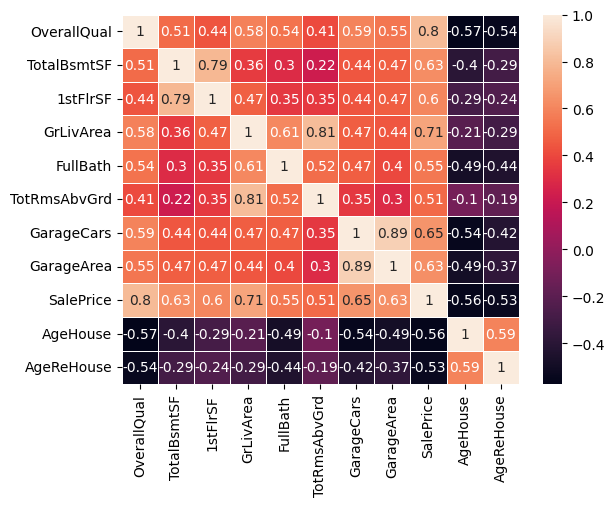

In [35]:
plt.figure()
sns.heatmap(df_train[highly_corr_var1].corr(),annot=True, linewidth=.7)
#plt.figure()
#sns.heatmap(df_train2[highly_corr_var2].corr(),annot=True, linewidth=.7)

Little bit better after applying transform. Choose relevant features for the training

In [36]:
df_feature = df_train.drop(columns = ['Id','TotalBsmtSF', 'GrLivArea','GarageCars'])
df_feature2 = df_test.drop(columns = ['Id','TotalBsmtSF', 'GrLivArea','GarageCars'])
df_feature.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeHouse,AgeReHouse
0,0.072503,RL,0.237751,-0.183889,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,0.721090,-0.534904,Gable,VinylSd,VinylSd,BrkFace,0.604966,Gd,TA,PConc,Gd,TA,No,GLQ,0.666941,Unf,-0.285505,-0.941560,Ex,Y,SBrkr,-0.817526,1.256666,-0.107963,1.122227,-0.241561,0.861748,1.255246,0.202577,-0.200794,Gd,1.113638,Typ,-0.933990,None,Attchd,0.296120,RFn,0.436756,TA,TA,Y,-0.742857,0.257632,-0.359342,-0.118841,-0.267202,-0.053039,-0.083079,-1.608724,WD,Normal,208500,-1.057103,-0.878330
1,-0.870627,RL,0.684252,-0.067574,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,-0.037382,2.191550,Gable,MetalSd,MetalSd,None,-0.570940,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.319473,Unf,-0.285505,-0.632956,Ex,Y,SBrkr,0.371149,-0.791795,-0.107963,-0.810267,3.933565,0.861748,-0.750855,0.202577,-0.200794,TA,-0.266091,Typ,0.649044,TA,Attchd,0.236333,RFn,-0.004955,TA,TA,Y,1.667302,-0.700675,-0.359342,-0.118841,-0.267202,-0.053039,-0.083079,-0.495787,WD,Normal,181500,-0.190898,0.378697
2,0.072503,RL,0.327052,0.099313,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,0.721090,-0.534904,Gable,VinylSd,VinylSd,BrkFace,0.400982,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.139158,Unf,-0.285505,-0.287505,Ex,Y,SBrkr,-0.630148,1.285450,-0.107963,1.122227,-0.241561,0.861748,1.255246,0.202577,-0.200794,Gd,-0.266091,Typ,0.649044,TA,Attchd,0.291692,RFn,0.737923,TA,TA,Y,-0.742857,-0.040857,-0.359342,-0.118841,-0.267202,-0.053039,-0.083079,0.988129,WD,Normal,223500,-0.990472,-0.829983
3,0.308285,RL,0.088918,-0.072631,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,0.721090,-0.534904,Gable,Wd Sdng,Wd Shng,None,-0.570940,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.508576,Unf,-0.285505,-0.043385,Gd,Y,SBrkr,-0.510110,1.021597,-0.107963,1.122227,-0.241561,-1.014531,-0.750855,0.202577,-0.200794,Gd,0.423774,Typ,0.649044,Gd,Detchd,0.285049,Unf,0.908584,TA,TA,Y,-0.742857,-0.150827,4.100519,-0.118841,-0.267202,-0.053039,-0.083079,-1.608724,WD,Abnorml,140000,1.808036,0.620433
4,0.072503,RL,0.803319,0.403755,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,1.479562,-0.534904,Gable,VinylSd,VinylSd,BrkFace,1.528892,Gd,TA,PConc,Gd,TA,Av,GLQ,0.544592,Unf,-0.285505,-0.158536,Ex,Y,SBrkr,0.028600,1.734001,-0.107963,1.122227,-0.241561,0.861748,1.255246,1.485869,-0.200794,Gd,1.803503,Typ,0.649044,TA,Attchd,0.289477,RFn,1.882357,TA,TA,Y,0.809997,0.618961,-0.359342,-0.118841,-0.267202,-0.053039,-0.083079,2.101066,WD,Normal,250000,-0.957156,-0.733289


In [37]:
df_feature.shape, df_feature2.shape

((1400, 67), (1459, 66))

In [38]:
# Agg columns to make new one

#Total area of property
df_feature['Total_SQ']   = df_train['1stFlrSF']+df_train['2ndFlrSF']+df_train['TotalBsmtSF']
df_feature['Total_bath'] = df_train['FullBath']+df_train['HalfBath']*0.5 + df_train['BsmtFullBath'] + df_train['BsmtHalfBath']*0.5
df_feature['Total_porch']= df_train['OpenPorchSF'] +df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF'] +df_train['3SsnPorch']

#Amenity of property
df_feature['Has_pool']     = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_feature['Has_2ndFloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_feature['Has_garage']   = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_feature['Has_base']     = df_train['TotalBsmtSF'].apply(lambda x: 1 if x >0 else 0)
df_feature['Has_fire']     = df_train['Fireplaces'].apply(lambda x: 1 if x>0 else 0)


In [39]:
# Agg columns to make new one for Test

#Total area of property
df_feature2['Total_SQ']   = df_test['1stFlrSF']+df_test['2ndFlrSF']+df_test['TotalBsmtSF']
df_feature2['Total_bath'] = df_test['FullBath']+df_test['HalfBath']*0.5 + df_test['BsmtFullBath'] + df_test['BsmtHalfBath']*0.5
df_feature2['Total_porch']= df_test['OpenPorchSF'] +df_test['EnclosedPorch'] + df_test['ScreenPorch'] + df_test['WoodDeckSF'] +df_test['3SsnPorch']

#Amenity of property
df_feature2['Has_pool']     = df_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_feature2['Has_2ndFloor'] = df_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_feature2['Has_garage']   = df_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_feature2['Has_base']     = df_test['TotalBsmtSF'].apply(lambda x: 1 if x >0 else 0)
df_feature2['Has_fire']     = df_test['Fireplaces'].apply(lambda x: 1 if x>0 else 0)

In [40]:
print(df_feature.shape, df_feature2.shape)
df_feature.head()

(1400, 75) (1459, 74)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeHouse,AgeReHouse,Total_SQ,Total_bath,Total_porch,Has_pool,Has_2ndFloor,Has_garage,Has_base,Has_fire
0,0.072503,RL,0.237751,-0.183889,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,0.721090,-0.534904,Gable,VinylSd,VinylSd,BrkFace,0.604966,Gd,TA,PConc,Gd,TA,No,GLQ,0.666941,Unf,-0.285505,-0.941560,Ex,Y,SBrkr,-0.817526,1.256666,-0.107963,1.122227,-0.241561,0.861748,1.255246,0.202577,-0.200794,Gd,1.113638,Typ,-0.933990,None,Attchd,0.296120,RFn,0.436756,TA,TA,Y,-0.742857,0.257632,-0.359342,-0.118841,-0.267202,-0.053039,-0.083079,-1.608724,WD,Normal,208500,-1.057103,-0.878330,-0.015605,2.490818,-1.230610,0,1,1,0,0
1,-0.870627,RL,0.684252,-0.067574,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,-0.037382,2.191550,Gable,MetalSd,MetalSd,None,-0.570940,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.319473,Unf,-0.285505,-0.632956,Ex,Y,SBrkr,0.371149,-0.791795,-0.107963,-0.810267,3.933565,0.861748,-0.750855,0.202577,-0.200794,TA,-0.266091,Typ,0.649044,TA,Attchd,0.236333,RFn,-0.004955,TA,TA,Y,1.667302,-0.700675,-0.359342,-0.118841,-0.267202,-0.053039,-0.083079,-0.495787,WD,Normal,181500,-0.190898,0.378697,0.170696,1.642836,0.221242,0,0,0,1,1
2,0.072503,RL,0.327052,0.099313,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,0.721090,-0.534904,Gable,VinylSd,VinylSd,BrkFace,0.400982,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.139158,Unf,-0.285505,-0.287505,Ex,Y,SBrkr,-0.630148,1.285450,-0.107963,1.122227,-0.241561,0.861748,1.255246,0.202577,-0.200794,Gd,-0.266091,Typ,0.649044,TA,Attchd,0.291692,RFn,0.737923,TA,TA,Y,-0.742857,-0.040857,-0.359342,-0.118841,-0.267202,-0.053039,-0.083079,0.988129,WD,Normal,223500,-0.990472,-0.829983,0.365456,2.490818,-1.529099,0,1,1,0,1
3,0.308285,RL,0.088918,-0.072631,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,0.721090,-0.534904,Gable,Wd Sdng,Wd Shng,None,-0.570940,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.508576,Unf,-0.285505,-0.043385,Gd,Y,SBrkr,-0.510110,1.021597,-0.107963,1.122227,-0.241561,-1.014531,-0.750855,0.202577,-0.200794,Gd,0.423774,Typ,0.649044,Gd,Detchd,0.285049,Unf,0.908584,TA,TA,Y,-0.742857,-0.150827,4.100519,-0.118841,-0.267202,-0.053039,-0.083079,-1.608724,WD,Abnorml,140000,1.808036,0.620433,-0.200915,-0.388512,2.820793,0,1,1,0,1
4,0.072503,RL,0.803319,0.403755,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,1.479562,-0.534904,Gable,VinylSd,VinylSd,BrkFace,1.528892,Gd,TA,PConc,Gd,TA,Av,GLQ,0.544592,Unf,-0.285505,-0.158536,Ex,Y,SBrkr,0.028600,1.734001,-0.107963,1.122227,-0.241561,0.861748,1.255246,1.485869,-0.200794,Gd,1.803503,Typ,0.649044,TA,Attchd,0.289477,RFn,1.882357,TA,TA,Y,0.809997,0.618961,-0.359342,-0.118841,-0.267202,-0.053039,-0.083079,2.101066,WD,Normal,250000,-0.957156,-0.733289,2.052483,2.490818,0.683573,0,1,1,1,1


In [41]:
num_col_ = df_feature.select_dtypes(include='number').columns
cat_col_ = df_feature.select_dtypes(include='object').columns
print(len(num_col_), len(cat_col_))

num_col_2 = df_feature2.select_dtypes(include='number').columns
cat_col_2 = df_feature2.select_dtypes(include='object').columns
print(len(num_col_2), len(cat_col_2))


41 34
40 34


In [42]:
df_final = pd.get_dummies(df_feature.drop(columns='SalePrice')).reset_index(drop=True)
df_final.shape

(1400, 264)

In [43]:
df_final_test = pd.get_dummies(df_feature2).reset_index(drop=True)
df_final_test.shape

(1459, 262)

Looking for missing features so that two data type has same numbers of feature

In [44]:
df_final_test['HouseStyle_2.5Fin'] = [0]*len(df_final_test)
df_final_test['Exterior1st_Stone'] = [0]*len(df_final_test)

In [45]:
df_final.shape, df_final_test.shape

((1400, 264), (1459, 264))

## 2. Model Build

In [46]:
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split, KFold
y = np.log1p(df_train["SalePrice"])
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size= 0.2, random_state=  60)

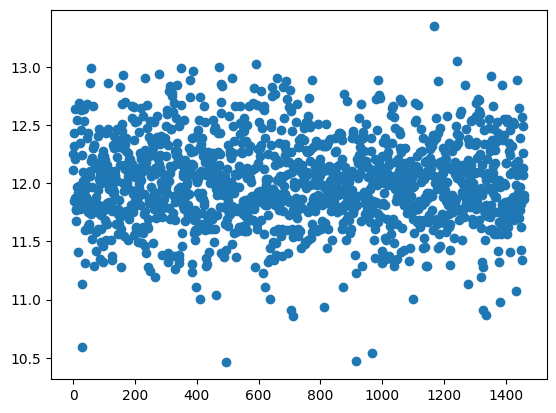

In [47]:
plt.plot(y, 'o')

List of models that I use:

1. RandomForest
2. XGBoost
3. Ridge 
4. Lasso 
5. GB Reg
6. LGBM Reg
7. SVR
8. Elasticnet

In [48]:
kfold = KFold(n_splits=5, shuffle=True, random_state=60)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evalutaion(pred, test):
    print("MAE: " , mean_absolute_error(test, pred))
    print("MSE: " , mean_squared_error(test, pred))
    print("R2 : " , r2_score(test, pred))
    
    return mean_absolute_error(test, pred), mean_squared_error(test, pred), r2_score(test, pred)

**Random Forest**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline

rfg_param = {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [None, 5, 10, 30],
        'min_samples_split': [2, 5, 10],
    }

rfg = RandomForestRegressor(random_state= 60)
rfg_grid = GridSearchCV(rfg, rfg_param, scoring='neg_mean_squared_error', cv=kfold)
rfg_grid.fit(X_train, y_train)
# Print the best parameters found during the search
print("Best parameters found: ", rfg_grid.best_params_)
print("Best Score : ", rfg_grid.best_score_)

y_pred_rfg = rfg_grid.predict(X_test)

In [ ]:
rfg_mae, rfg_mse, rfg_r2 = evalutaion(y_pred_rfg, y_test)

##### XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb_param= {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 1, 10],
        'max_depth': [3, 6, 10]
    }

xgb =  XGBRegressor(random_state=60)
xgb_grid = GridSearchCV(xgb, xgb_param, scoring='neg_mean_squared_error', cv=kfold)
xgb_grid.fit(X_train, y_train)
# Print the best parameters found during the search
print("Best parameters found: ", xgb_grid.best_params_)
print("Best Score : ", xgb_grid.best_score_)

y_pred_xgb = xgb_grid.predict(X_test)

In [ ]:
xgb_mae, xgb_mse, xgb_r2 = evalutaion(y_pred_xgb, y_test)

##### Ridge

In [ ]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV

ridge_param = {
    "alphas": [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9]
}
ridge = RidgeCV()
ridge_grid = GridSearchCV(ridge, ridge_param, scoring='neg_mean_squared_error', cv=kfold)
ridge_grid.fit(X_train, y_train)
# Print the best parameters found during the search
print("Best parameters found: ", ridge_grid.best_params_)
print("Best Score : ", ridge_grid.best_score_)

y_pred_ridge = ridge_grid.predict(X_test)

In [ ]:
ridge_mae, ridge_mse, ridge_r2 = evalutaion(y_pred_ridge, y_test)

##### Lasso

In [ ]:
lasso_param = {
    "alphas": [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
}
lasso = LassoCV(max_iter=10000000, alphas= lasso_param['alphas'], random_state=60, cv=kfold)
#lasso_grid = GridSearchCV(lasso, lasso_param, scoring='neg_mean_squared_error', cv=kfold)
lasso.fit(X_train, y_train)
# Print the best parameters found during the search
#print("Best parameters found: ", lasso_grid.best_params_)
#print("Best Score : ", lasso_grid.best_score_)

y_pred_lasso = lasso.predict(X_test)
lasso_mae, lasso_mse, lasso_r2 = evalutaion(y_pred_lasso, y_test)

##### SVR

In [ ]:
from sklearn.svm import SVR

svr_param = {
    "C": [10, 15, 20, 25],
    "epsilon" : [0.001, 0.005, 0.008, 0.01, 0.05, 0.1],
    "gamma" : [0.0004, 0.0005]#, 0.0006, 0.0007, 0.0008]
}
svr = SVR()
svr_grid = GridSearchCV(svr, svr_param, scoring='neg_mean_squared_error', cv=kfold)
svr_grid.fit(X_train, y_train)
# Print the best parameters found during the search
print("Best parameters found: ", svr_grid.best_params_)
print("Best Score : ", svr_grid.best_score_)

In [ ]:
y_pred_svr = svr_grid.predict(X_test)
svr_mae, svr_mse, svr_r2 = evalutaion(y_pred_svr, y_test)

##### Gradient Boosting Reg

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_param = {
    'n_estimators': [1000, 3000, 5000],
    'learning_rate': [0.01, 0.05, 0.1, 1],
    'max_depth': [3,4,5,6,7],
    'min_samples_leaf':[10, 15, 20],
    'min_samples_split':[5, 10, 15, 20],
    
}
gbr = GradientBoostingRegressor(max_features='sqrt', loss='huber', random_state =60)
gbr_grid = GridSearchCV(gbr, gbr_param,  scoring='neg_mean_squared_error', cv=kfold)
gbr_grid.fit(X_train, y_train)
# Print the best parameters found during the search
print("Best parameters found: ", gbr_grid.best_params_)
print("Best Score : ", gbr_grid.best_score_)

y_pred_gbr = gbr_grid.predict(X_test)


In [ ]:
svr_mae, svr_mse, svr_r2 = evalutaion(y_pred_gbr, y_test)

In [ ]:
_, _, _ = evalutaion(y_pred_ridge*0.15+y_pred_xgb*0.15+y_pred_rfg*0.1 + y_pred_lasso*0.15+y_pred_svr*0.45, y_test)

In [ ]:
_, _, _ = evalutaion(y_pred_ridge*0.15+y_pred_xgb*0.15+y_pred_rfg*0.1 + y_pred_lasso*0.15+y_pred_svr*0.45, y_test)

In [ ]:
df_test.isna().sum().sum(), df_final_test.isna().sum().sum()

In [ ]:
# Percentage of missing values for each feature
# Compute the percentage of missing values in each column
missing_percentage = (df_final_test.isnull().sum() / len(df_final_test)) * 100

# Sort the missing percentage values in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Create a scrollable table with the sorted missing percentages
html_missing_percentage = create_scrollable_table(missing_percentage_sorted.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

# Display the table
display(HTML(html_missing_percentage))

In [ ]:
df_final_test['Exterior2nd_Other'] = [0]* len(df_final_test)
df_final_test['GarageQual_Ex'] = [0]* len(df_final_test)
df_final_test['Electrical_Mix'] = [0]* len(df_final_test)
df_final_test['Electrical_None'] = [0]* len(df_final_test)
df_final_test['Exterior1st_ImStucc'] = [0]* len(df_final_test)
df_final_test['Exterior1st_MetalSd'] = [0]* len(df_final_test)

In [ ]:
df_final_test.drop(columns=['Exterior1st_None', 'Exterior2nd_None','KitchenQual_None','Functional_None','SaleType_None',], inplace=True)

In [ ]:
df_test.isna().sum().sum(), df_final_test.isna().sum().sum()

In [ ]:
df_final.shape, df_final_test.shape

## Submission

In [ ]:
df_final_test = df_final_test.reindex(columns=df_final.columns)

In [ ]:
y_pred_xgb_test  = xgb_grid.predict(df_final_test)
y_pred_ridge_test= ridge_grid.predict(df_final_test)
y_pred_svr_test = svr_grid.predict(df_final_test)
y_pred_lasso_test = lasso.predict(df_final_test)
y_pred_rfg_test = rfg_grid.predict(df_final_test)


In [ ]:
y_pred_test = y_pred_ridge_test*0.15+y_pred_xgb_test*0.15+y_pred_rfg_test*0.1 + y_pred_lasso_test*0.15+y_pred_svr_test*0.45

In [ ]:
len(y_pred_test)

In [ ]:
y_pred_test_final = np.exp(y_pred_test)

In [ ]:
df_stack_out = df_test[['Id']].copy()
df_stack_out['SalePrice'] = y_pred_test_final

In [ ]:
df_stack_out.to_csv('submission.csv', index=False)